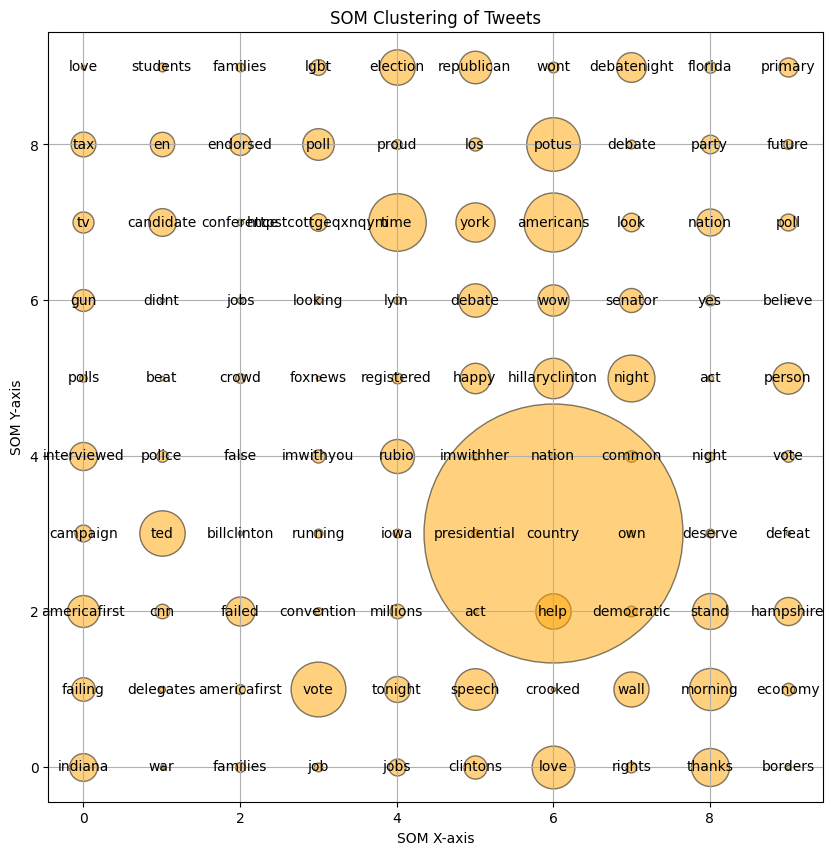

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned tweets dataset
tweets_df = pd.read_csv('tweets_cleaned.csv')

# Load stopwords from the provided file and clean them
with open('stopwords.txt', 'r') as file:
    stopwords = [line.strip() for line in file if line.strip()]

# Vectorize the cleaned_text column with stopwords
vectorizer = CountVectorizer(stop_words=stopwords, max_features=500)
keyword_matrix = vectorizer.fit_transform(tweets_df['cleaned_text']).toarray()

# Initialize SOM (10x10 grid)
som_width, som_height = 10, 10
som = MiniSom(x=som_width, y=som_height, input_len=keyword_matrix.shape[1], sigma=0.5, learning_rate=0.5)
som.random_weights_init(keyword_matrix)
som.train_random(data=keyword_matrix, num_iteration=100)

# Map each sample to its BMU (Best Matching Unit)
bmus = [som.winner(x) for x in keyword_matrix]
bmu_counts = {bmu: bmus.count(bmu) for bmu in set(bmus)}

# Extract the feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Get the top keyword for each BMU based on the samples assigned to it
bmu_keywords = {}
for bmu in set(bmus):
    indices = [i for i, b in enumerate(bmus) if b == bmu]
    keyword_counts = keyword_matrix[indices].sum(axis=0)
    top_keyword = keywords[keyword_counts.argmax()]
    bmu_keywords[bmu] = top_keyword

# Visualize the SOM
plt.figure(figsize=(10, 10))
for (x, y), count in bmu_counts.items():
    size = count * 10  # Adjust size multiplier for better visibility
    plt.scatter(x, y, s=size, alpha=0.5, c='orange', edgecolors='black')
    keyword = bmu_keywords.get((x, y), "")
    plt.text(x, y, keyword, fontsize=10, ha='center', va='center', color='black')

plt.title('SOM Clustering of Tweets')
plt.xlabel('SOM X-axis')
plt.ylabel('SOM Y-axis')
plt.grid(True)
plt.show()
